In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
subs = pd.read_csv("data/auctions.csv", dtype = {"platform": np.int8, "ref_type_id": np.int8, "source_id": np.int8}, usecols = ['date', 'platform', 'source_id'])
#evts = pd.read_csv("data/events.csv", dtype = {"event_id": np.int16, "application_id": np.int16})
#inst = pd.read_csv("data/installs.csv", dtype = {"application_id": np.int16, "click_hash": np.float16})
clks = pd.read_csv("data/clicks.csv.gzip", dtype = {"advertiser_id": np.int8, "action_id": np.float16, "source_id": np.int8, "wifi_connection": bool, "carrier_id": np.float16, "brand": np.float16, "touchX": np.float16, "touchY": np.float16})

# Análisis sobre los clicks

In [3]:
clks.describe()

,advertiser_id,action_id,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351.000000,0.0,26351.000000,2.635100e+04,26351.000000,26351.000000,2.634000e+04,2.633900e+04,3.243000e+03,2.633900e+04,2.635100e+04,6235.000000,22977.000000,23011.000000,23011.000000,2.635100e+04,2.635100e+04
mean,2.991993,NaN,1.245266,6.333597e+18,1.206906,1.070233,inf,4.635375e+18,4.171028e+18,3.913451e+18,1.299055e+18,1.481445,230.403309,0.639160,1.478516,1.888100e+18,4.611581e+18
std,0.164070,NaN,2.188948,1.024019e+03,0.004484,0.001896,7.015625e+00,1.642969e+18,2.460496e+18,1.885866e+18,1.149672e+18,1.583008,976.849149,0.302002,2.623047,1.721252e+17,2.673175e+18
min,0.000000,NaN,0.000000,6.333597e+18,1.205058,1.058204,0.000000e+00,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.000000,0.017000,0.000000,0.000000,1.494519e+18,9.286192e+14
25%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,3.000000e+00,3.378640e+18,1.975183e+18,1.774085e+18,3.921844e+17,0.000000,2.915000,0.426025,0.182983,1.891515e+18,2.273798e+18
50%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,6.000000e+00,3.511538e+18,3.516812e+18,3.072849e+18,3.921844e+17,1.000000,10.588000,0.726074,0.645020,1.891515e+18,4.623721e+18
75%,3.000000,NaN,1.000000,6.333597e+18,1.205689,1.070234,1.300000e+01,6.391567e+18,6.589622e+18,4.566454e+18,2.733036e+18,2.000000,71.703000,0.900879,0.991211,1.891515e+18,6.917850e+18
max,8.000000,NaN,10.000000,6.333597e+18,1.237861,1.085358,1.160000e+02,9.081082e+18,9.221733e+18,7.499732e+18,8.930605e+18,13.000000,17616.188000,1.000000,16.593750,6.323872e+18,9.221118e+18


In [4]:
clks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.904785,0.078003,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035004,0.430908,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.053986,0.423096,1891515180541284343,4368617728156436525


In [5]:
clks['wifi_connection'].value_counts()

False    26351
Name: wifi_connection, dtype: int64

In [6]:
clks.memory_usage(deep = True).sum()

6904042

## ¿Cómo se distribuye el tiempo que tardan los usuarios en dar click?

In [7]:
clks.count()

advertiser_id      26351
action_id              0
source_id          26351
created            26351
country_code       26351
latitude           26351
longitude          26351
wifi_connection    26351
carrier_id         26340
trans_id           26351
os_minor           26339
agent_device        3243
os_major           26339
specs_brand        26351
brand               6235
timeToClick        22977
touchX             23011
touchY             23011
ref_type           26351
ref_hash           26351
dtype: int64

In [8]:
clickTime = clks['timeToClick'].dropna()

In [9]:
clickTime.count()

22977

In [10]:
clickTime.nlargest(5)

23818    17616.188
5606     16915.195
13465    16698.536
14350    16466.667
15691    15776.097
Name: timeToClick, dtype: float64

Text(0, 0.5, 'Frecuencia')

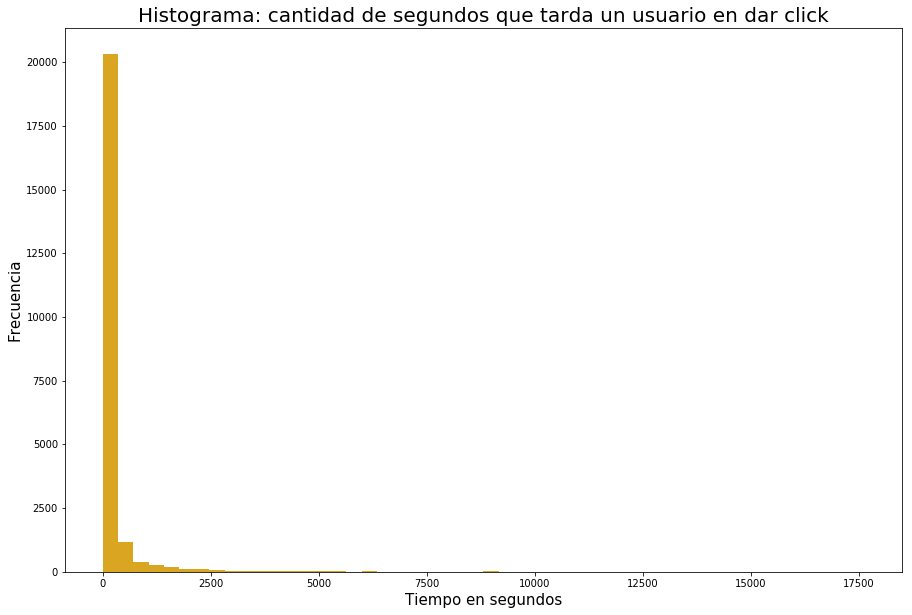

In [11]:
grafico = clickTime.plot.hist(bins=50, color='goldenrod', figsize=(15,10))
grafico.set_title("Histograma: cantidad de segundos que tarda un usuario en dar click", fontsize = 20)
grafico.set_xlabel("Tiempo en segundos",fontsize=15)
grafico.set_ylabel("Frecuencia", fontsize=15)

Veamos si aplicando el logaritmo se logra un gráfico más descriptivo:

In [12]:
clickTimeLog = clickTime.transform(lambda x: np.log(x))

Text(0, 0.5, 'Frecuencia')

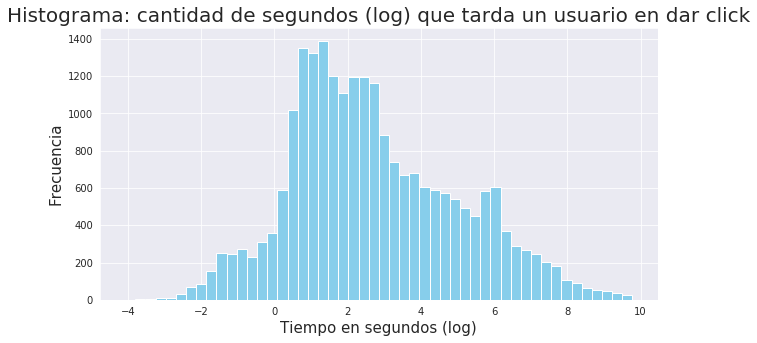

In [13]:
sns.set_style('darkgrid')
grafico_log = clickTimeLog.plot.hist(bins=50, color='skyblue', figsize=(10,5))
grafico_log.set_title("Histograma: cantidad de segundos (log) que tarda un usuario en dar click", fontsize = 20)
grafico_log.set_xlabel("Tiempo en segundos (log)",fontsize=15)
grafico_log.set_ylabel("Frecuencia", fontsize=15)

## Veamos ahora qué sucede con la posición desde donde se dan los clicks:

In [14]:
clickPos = clks.loc[:, ['touchX', 'touchY']].dropna()
clickPos.head()

,touchX,touchY
0,0.904785,0.078003
2,0.945801,0.472900
3,0.035004,0.430908
4,0.053986,0.423096
5,0.605957,0.458984


In [15]:
clickPos['touchX'].value_counts().head()

0.996094    204
0.994141    129
0.995117    110
0.937988     94
0.998047     92
Name: touchX, dtype: int64

In [16]:
clickPos['touchY'].value_counts().head()

0.000000    193
0.998047    140
0.994141     81
0.996094     80
0.022995     79
Name: touchY, dtype: int64

Veo si un gráfico de distribución conjunta me muestra algo sobre estos valores

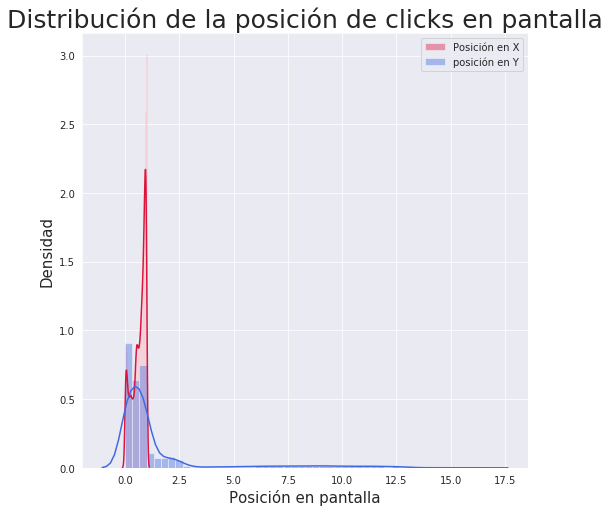

In [17]:
plt.figure(figsize=(8,8))
g_dist = sns.distplot(clickPos['touchX'], color='crimson', label = 'Posición en X')
g_dist = sns.distplot(clickPos['touchY'], color='royalblue', label = 'posición en Y')
g_dist.set_title("Distribución de la posición de clicks en pantalla", fontsize = 25)
g_dist.set_xlabel("Posición en pantalla", fontsize = 15)
g_dist.set_ylabel("Densidad", fontsize = 15)
g_dist.legend()

Alternativa utilizando un Scatter plot

Text(0, 0.5, 'Posición en Y')

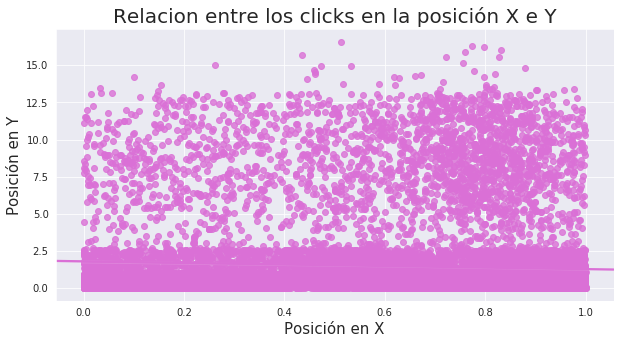

In [18]:
plt.figure(figsize = (10,5))
g = sns.regplot(x = "touchX", y = "touchY", 
                    data = clickPos, color = 'orchid')
g.set_title("Relacion entre los clicks en la posición X e Y", fontsize = 20)
g.set_xlabel("Posición en X", fontsize = 15)
g.set_ylabel("Posición en Y", fontsize = 15)

# Análisis sobre las subastas

In [19]:
subs.describe()

,platform,source_id
count,1.957132e+07,1.957132e+07
mean,1.205888e+00,6.857898e-01
std,4.043488e-01,1.416215e+00
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00
max,2.000000e+00,6.000000e+00


In [20]:
subs.count()

date         19571319
platform     19571319
source_id    19571319
dtype: int64

## Veo que información puedo obtener de los días y horarios en que se realizan las subastas

In [21]:
subs['day'] = pd.to_datetime(subs['date'], format='%Y%m%d %H:%M:%S.%f').dt.day
subs['hour'] = pd.to_datetime(subs['date'], format='%Y%m%d %H:%M:%S.%f').dt.hour

In [22]:
subs.head()

,date,platform,source_id,day,hour
0,2019-03-11 14:18:33.290763,1,0,11,14
1,2019-03-11 14:18:34.440157,1,0,11,14
2,2019-03-11 14:18:35.862360,1,0,11,14
3,2019-03-11 14:18:36.167163,1,0,11,14
4,2019-03-11 14:18:37.728590,1,0,11,14


In [32]:
subs_counts = subs.groupby(['day', 'hour']).count()

In [33]:
subs_counts = subs_counts.reset_index()
subs_counts.head()

,day,hour,date,platform,source_id
0,5,0,14859,14859,14859
1,5,1,174893,174893,174893
2,5,2,155339,155339,155339
3,5,3,108498,108498,108498
4,5,4,74230,74230,74230


Text(69.0, 0.5, 'Día')

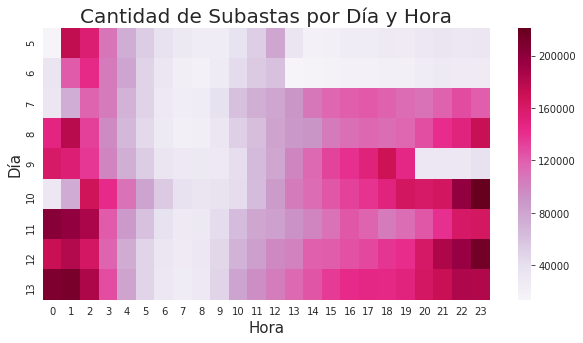

In [42]:
plt.figure(figsize = (10,5))
subs_day_hour = subs_counts.pivot_table(index='day', columns='hour', values='date', aggfunc='mean')
heatMap = sns.heatmap(subs_day_hour,  cmap="PuRd", )
heatMap.set_title("Cantidad de Subastas por Día y Hora", fontsize = 20)
heatMap.set_xlabel("Hora", fontsize = 15)
heatMap.set_ylabel("Día", fontsize = 15)